
<div style="text-align: center; color: white; background-color: #559cff; font-weight: bold; padding: 20px" >
 <p style="font-size: 40px"> Lab 1 - Data Visualization 📊</p>
 <p style="font-size: 30px"><u>Topic: Titanic - Machine Learning from Disaster</u> 🚢</p>

</div>


---

## Thông tin nhóm 👬
| Họ tên              |MSSV       |
|-------------------|----------|
| Nguyễn Khánh Nhân | 21127657         |
| Huỳnh Sỉ Kha | 21127734         |
| Đoàn Nam Thắng     | 21127740 |

## Mức độ đóng góp

| Họ tên              | Tỉ lệ đóng góp       |
|-------------------|----------------------|
| Nguyễn Khánh Nhân | 100%         |
| Huỳnh Sỉ Kha | 100%         |
| Đoàn Nam Thắng     | 100%         |

## Mục lục 📑
[1. Các thư viện sử dụng](#1-các-thư-viện-sử-dụng-📚) <br>
[2. Ghép nối dữ liệu và đọc dữ liệu](#2-ghép-nối-dữ-liệu-và-đọc-dữ-liệu-📂)<br>
[3. Một số thông tin cơ bản về dữ liệu](#3-một-số-thông-tin-cơ-bản-về-dữ-liệu-📝)<br>
[4. Làm sạch dữ liệu](#4-làm-sạch-dữ-liệu-🧹)<br>
[5. Xử lí các thuộc tính](#5-xử-lí-các-thuộc-tính-feature-engineering-🧮)<br>
[6. Phân tích dữ liệu](#6-phân-tích-dữ-liệu-eda-🔍)<br>
[7. Kết luận](#7-kết-luận-📝)


---

## 1. Các thư viện sử dụng 📚

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## 2. Ghép nối dữ liệu và đọc dữ liệu 📂

- Mục đích của Lab 1 là để phân tích và trực quan hóa dữ liệu chứ không phải xây dựng mô hình học máy nên ta sẽ ghép nối dữ liệu từ 3 file `train.csv`, `test.csv` và `gender_submission.csv` để tạo thành một bảng dữ liệu lớn hơn giúp ta dễ dàng phân tích hơn.

In [106]:
df1 = pd.read_csv('../data/train.csv')
df2 = pd.read_csv('../data/test.csv')
survived_col = pd.read_csv('../data/gender_submission.csv')
# ghép cột survived vào df2
df2['Survived'] = survived_col['Survived']
df = pd.concat([df1, df2], ignore_index=True)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
1182,1183,1,3,"Daly, Miss. Margaret Marcella Maggie""""",female,30.0,0,0,382650,6.9500,NaN,Q
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C


## 3. Một số thông tin cơ bản về dữ liệu 📝

- Ý nghĩa mỗi dòng trong dữ liệu: 
    - Mỗi dòng trong dữ liệu đại diện cho thông tin cá nhân của một hành khách trên chuyến tàu Titanic.

- Ý nghĩa của các cột dữ liệu

|Tên cột|Ý nghĩa|
|-|-|
|PassengerId|Mã hành khách|
|Survived|Trạng thái sống/chết (0: Chết, 1: Sống)|
|Pclass|Hạng vé (1: Hạng upper, 2: Hạng middle, 3: Hạng lower)|
|Name|Tên hành khách|
|Sex|Giới tính|
|Age|Tuổi|
|SibSp|Số lượng anh chị em hoặc vợ/chồng đi cùng|
|Parch|Số lượng bố mẹ hoặc con cái đi cùng|
|Ticket|Mã số vé|
|Fare|Giá vé|
|Cabin|Số phòng|
|Embarked|Cảng lên tàu (C: Cherbourg, Q: Queenstown, S: Southampton)|

- Kích thước tập dữ liệu

In [107]:
rows, cols = df.shape
print(f'Số lượng dòng trong tập dữ liệu: {rows}')
print(f'Số lượng cột trong tập dữ liệu: {cols}')

Số lượng dòng trong tập dữ liệu: 1309
Số lượng cột trong tập dữ liệu: 12


## 4. Làm sạch dữ liệu 🧹

- Kiểm tra số dòng bị trùng lặp

In [108]:
print(f"Dữ liệu có {df.duplicated().sum()} dòng bị trùng.")

Dữ liệu có 0 dòng bị trùng.


- Kiểm tra các cột có giá trị thiếu

In [109]:
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Age             263
Embarked          2
Fare              1
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

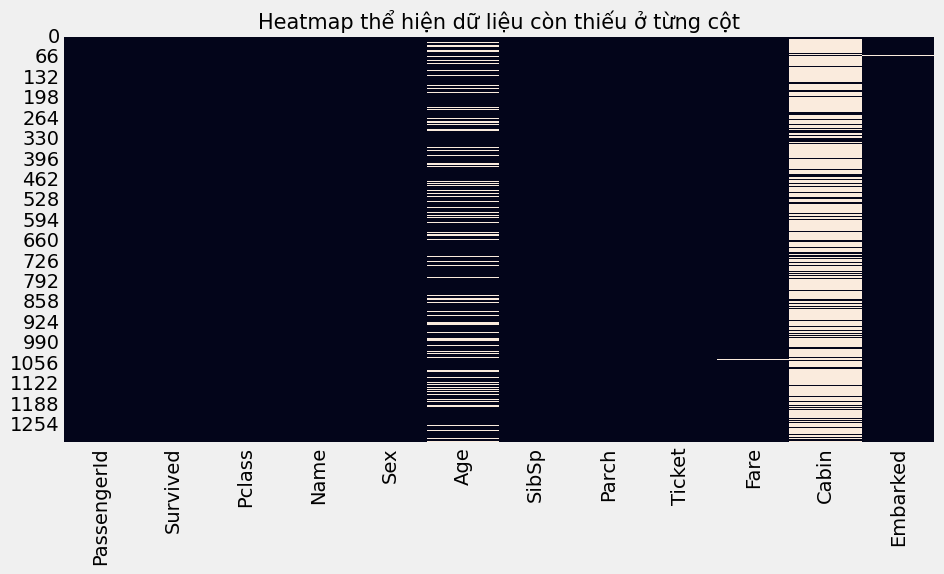

In [110]:
fig, axe = plt.subplots(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, ax=axe)
plt.title('Heatmap thể hiện dữ liệu còn thiếu ở từng cột', fontsize=15)
plt.show()

Nhận xét:
- Quan sát biểu độ trên, ta có thể thấy cột `Age` và `Cabin` có tỉ lệ giá trị thiếu cao (những dòng màu trắng tượng trưng cho giá trị bị thiếu), cần phải xử lý giá trị thiếu trước khi phân tích dữ liệu.
- Cột `Embarked` và `Fare` cũng tồn tại giá trị bị thiếu nhưng không đáng kể.

Xử lí các giá trị bị thiếu
- Ta sẽ chỉ thực hiện điền các giá trị bị thiếu ở 3 cột: `Age`, `Fare` và `Embarked`.
- Cột `Cabin` có tỉ lệ giá trị thiếu quá cao cũng như vì ý nghĩa của cột này (mã số phòng của hành khách) nên ta không thể điền giá trị bị thiếu cho cột này bằng cách nào cả. Vì vậy ta sẽ xóa cột này khỏi bảng dữ liệu.

Phương pháp xử lí:
- Đối với cột `Embarked`, đây là cột dạng category nên ta sẽ điền giá trị bị thiếu bằng giá trị xuất hiện nhiều nhất trong cột.
- Đối với cột `Fare` và `Age`, đây là cột dạng numeric nên ta sẽ điền giá trị bị thiếu bằng giá trị trung bình hoặc trung vị của cột.

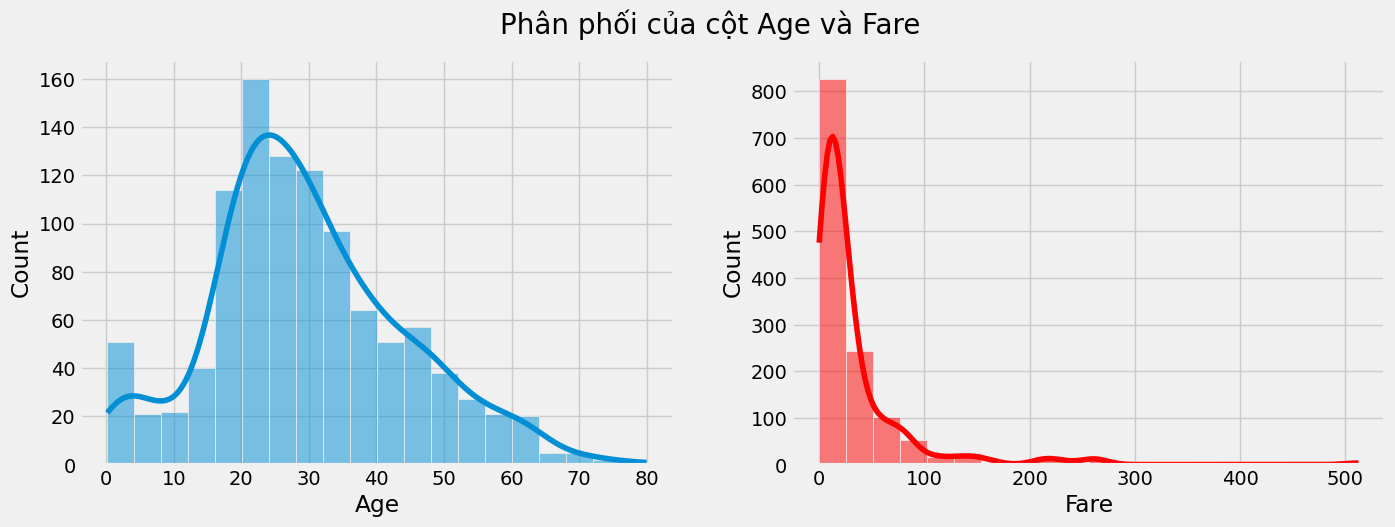

In [111]:
# draw histogram of Age and Fare
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Age'], ax=axes[0], kde=True, bins=20)
sns.histplot(df['Fare'], ax=axes[1], kde=True, bins=20, color='red')
plt.suptitle('Phân phối của cột Age và Fare', fontsize=20)
plt.show()

Nhận xét:
- Miền giá trị của cột `Fare` và `Age` khá rộng và phân phối bị lệch phải (right-skewed) nên việc điền giá trị bị thiếu bằng giá trị trung bình có thể làm sai lệch phân phối của dữ liệu. Vì vậy ta quyết định điền giá trị bị thiếu bằng giá trị trung vị.

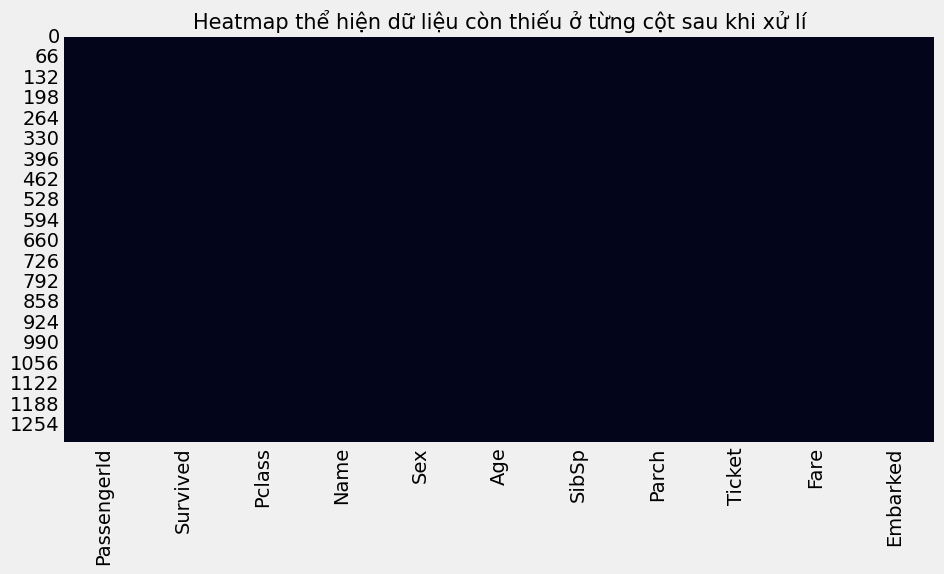

In [112]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

fig, axe = plt.subplots(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, ax=axe)
plt.title('Heatmap thể hiện dữ liệu còn thiếu ở từng cột sau khi xử lí', fontsize=15)
plt.show()

## 5. Xử lí các thuộc tính (Feature Engineering) 🧮

- Đối với cột `Name`, nếu quan sát kĩ ta có thể thấy mỗi tên hành khách đều có một tiền tố (Mr, Mrs, Miss, Master, ...) thể hiện độ tuổi và giới tính của hành khách. Ta sẽ trích xuất thông tin này ra thành một cột mới `Title` và sử dụng cột này để phân tích thay vì cột `Name`.

In [113]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

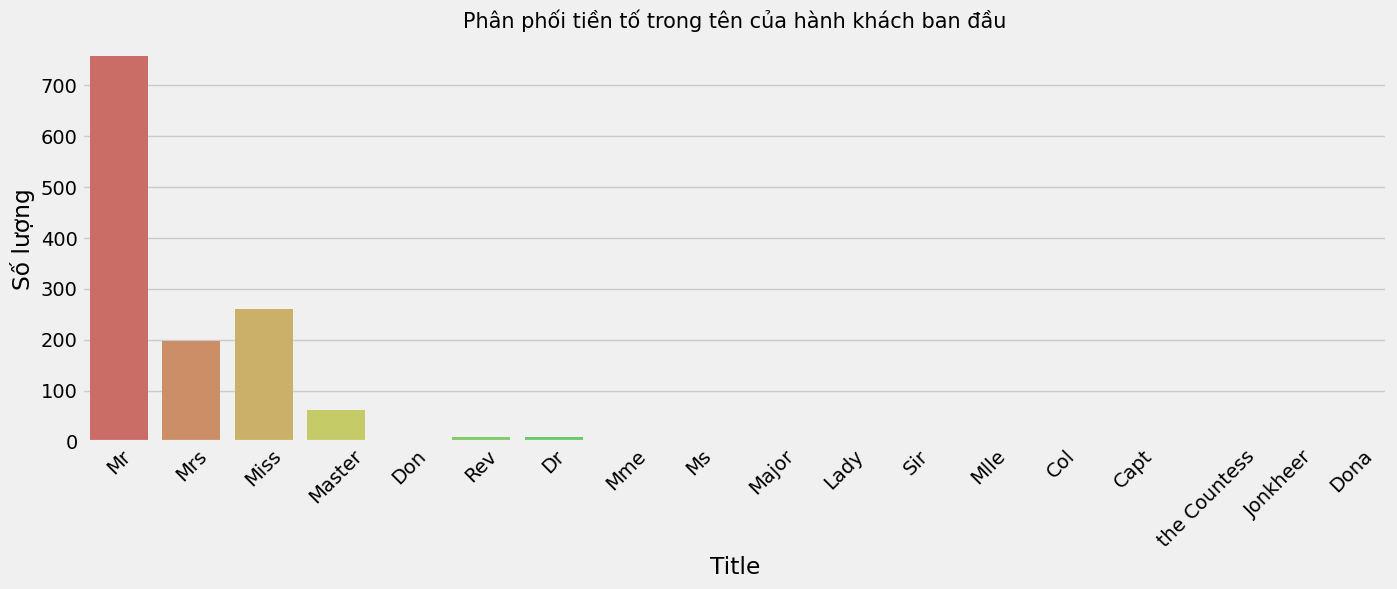

In [114]:
name = df['Name']
df['Title'] = [i.split(".")[0].split(",")[-1].strip() for i in name]

fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='Title', data=df, ax=ax, palette='hls')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.title('Phân phối tiền tố trong tên của hành khách ban đầu', fontsize=15)
plt.show()

Có tương đối nhiều tiền tố khác nhau trong cột `Name` nên ta sẽ tìm hiểu ý nghĩa của từng tiền tố và gom nhóm chúng lại thành các nhóm chính. <br>
Don =  Mr,
Rev = Other,
Dr = Other,
Mme = Mrs,
Ms = Miss,
Lady = Miss,
Major = Other,
Sir = Other,
Mlle = Miss,
Col = Other,
Capt = Other,
the Countess = Other,
Jonkheer = Other,
Dona = Other.

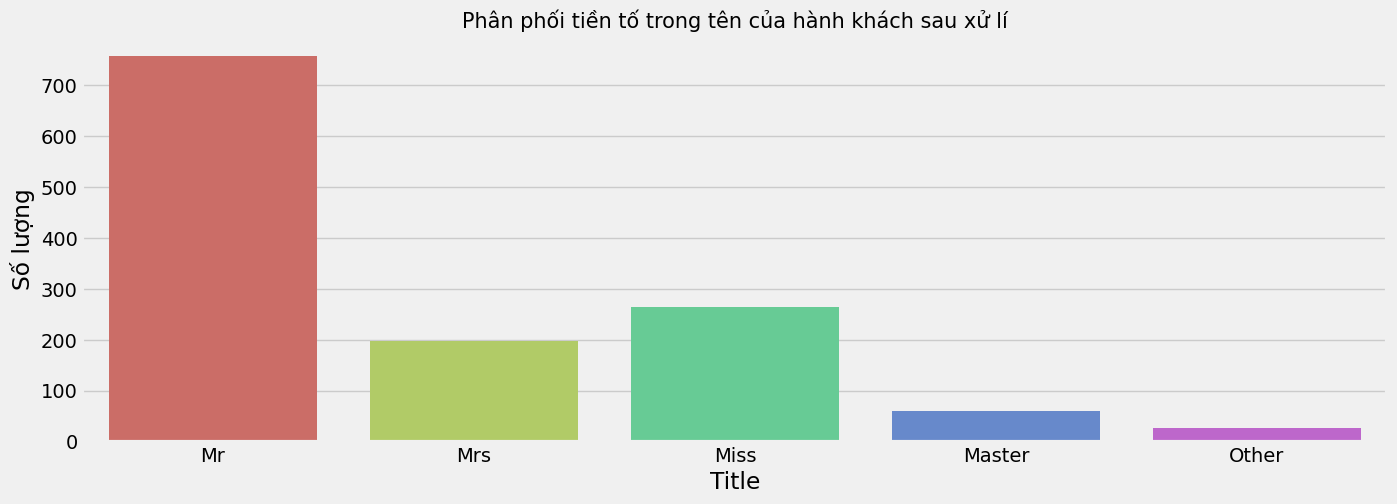

In [115]:
df["Title"] = df["Title"].replace(["Rev", "Dr", "Major", "Sir", "Col", "Capt", "the Countess", "Jonkheer", "Dona"], "Other")
df["Title"] = df["Title"].replace(["Mlle", "Ms", "Lady"], "Miss")
df["Title"] = df["Title"].replace("Mme", "Mrs")
df["Title"] = df["Title"].replace("Don", "Mr") 

fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='Title', data=df, ax=ax, palette='hls')
plt.ylabel('Số lượng')
plt.title('Phân phối tiền tố trong tên của hành khách sau xử lí', fontsize=15)
plt.show()

- Đối với cột `SibSp` và `Parch`, ta sẽ tạo thêm một cột mới `FamilySize` để thể hiện kích thước gia đình của hành khách.

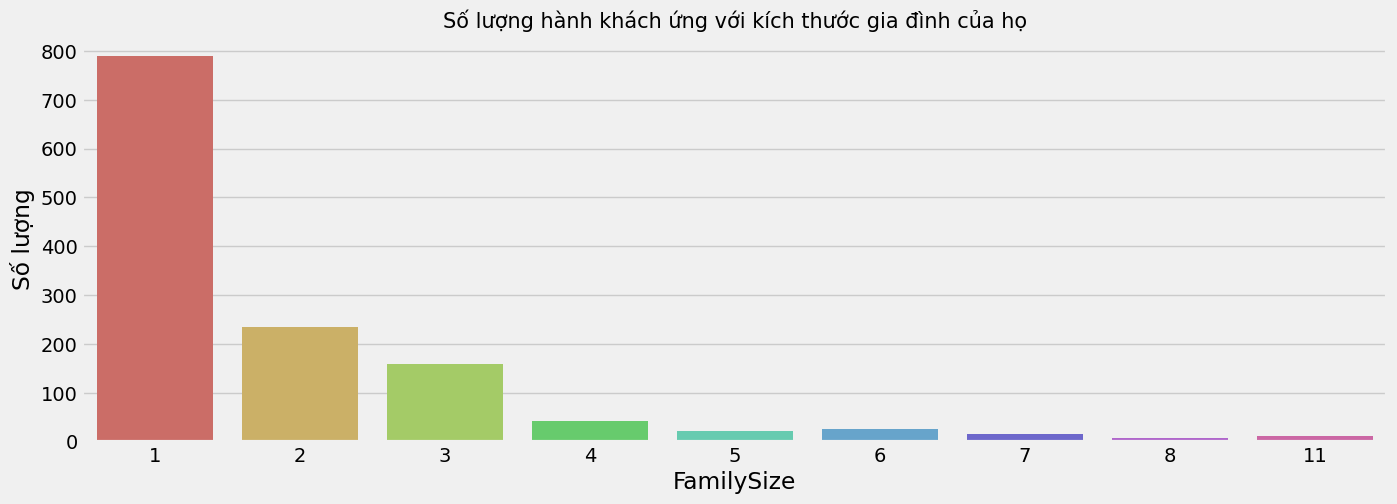

In [116]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', data=df, ax=ax, palette='hls')
plt.ylabel('Số lượng')
plt.title('Số lượng hành khách ứng với kích thước gia đình của họ', fontsize=15)
plt.show()

## 6. Phân tích dữ liệu (EDA) 🔍

- Để khám phá và rút ra được các kết luận từ dữ liệu, ta sẽ thực hiện trả lời các câu hỏi để từ đó đưa ra các phân tích và trực quan hóa dữ liệu.

### Tỷ lệ sống sót trên chuyến tàu `Titanic`?

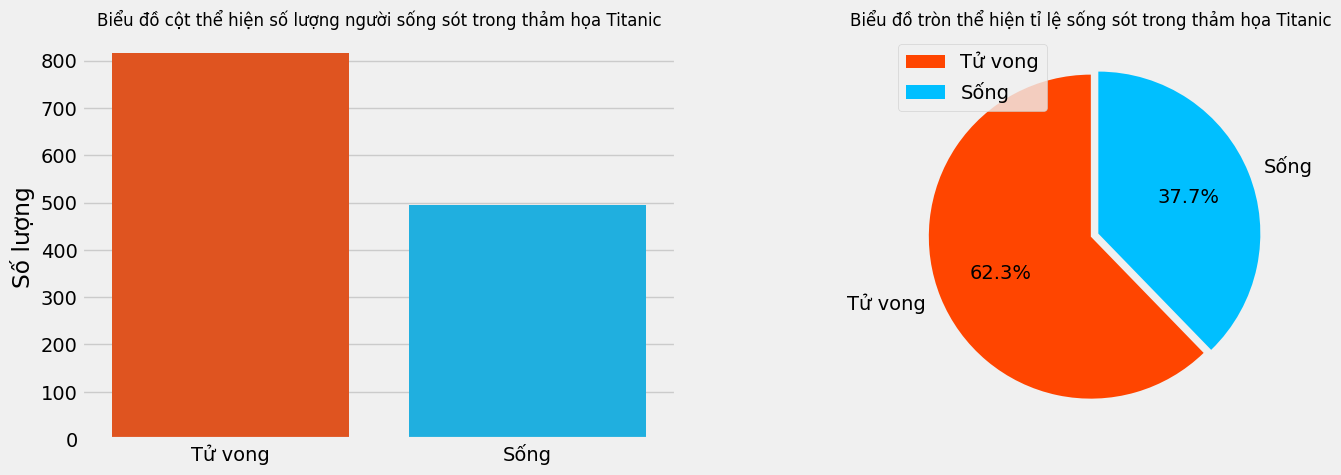

In [117]:
survived = np.array(df['Survived'].value_counts())
survived_label = ['Tử vong', 'Sống']
survived_explode = [0, 0.05]

# Vẽ biểu đồ cột
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Survived', data=df, ax=axes[0], palette=['orangered', 'deepskyblue'])
axes[0].set_title('Biểu đồ cột thể hiện số lượng người sống sót trong thảm họa Titanic', fontsize=12)
axes[0].set_xticklabels(survived_label)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Số lượng')

# Vẽ biểu đồ tròn
axes[1].pie(survived, labels=survived_label, explode=survived_explode, startangle=90, autopct='%1.1f%%', colors=['orangered', 'deepskyblue'])
axes[1].set_title('Biểu đồ tròn thể hiện tỉ lệ sống sót trong thảm họa Titanic', fontsize=12)
axes[1].legend(loc='upper left')
plt.show()

**Nhận xét**:
- Qua biểu đồ cột, ta thấy rằng số lượng người chết trên chuyến tàu `Titanic` nhiều hơn số lượng người sống sót rất nhiều.
- Tỷ lệ sống sót trên chuyến tàu `Titanic` là khoảng **37.7%**. Trong khi đó, tỷ lệ chết là **62.3%** nên có thể thấy rằng chuyến tàu `Titanic` đã gặp nạn nghiêm trọng và trở thành một trong những vụ tai nạn thương tâm nhất trong lịch sử hàng hải.

### Liệu có sự tương quan giữa giới tính và khả năng sống sót? Tỷ lệ sống sót khác nhau giữa nam và nữ như thế nào?

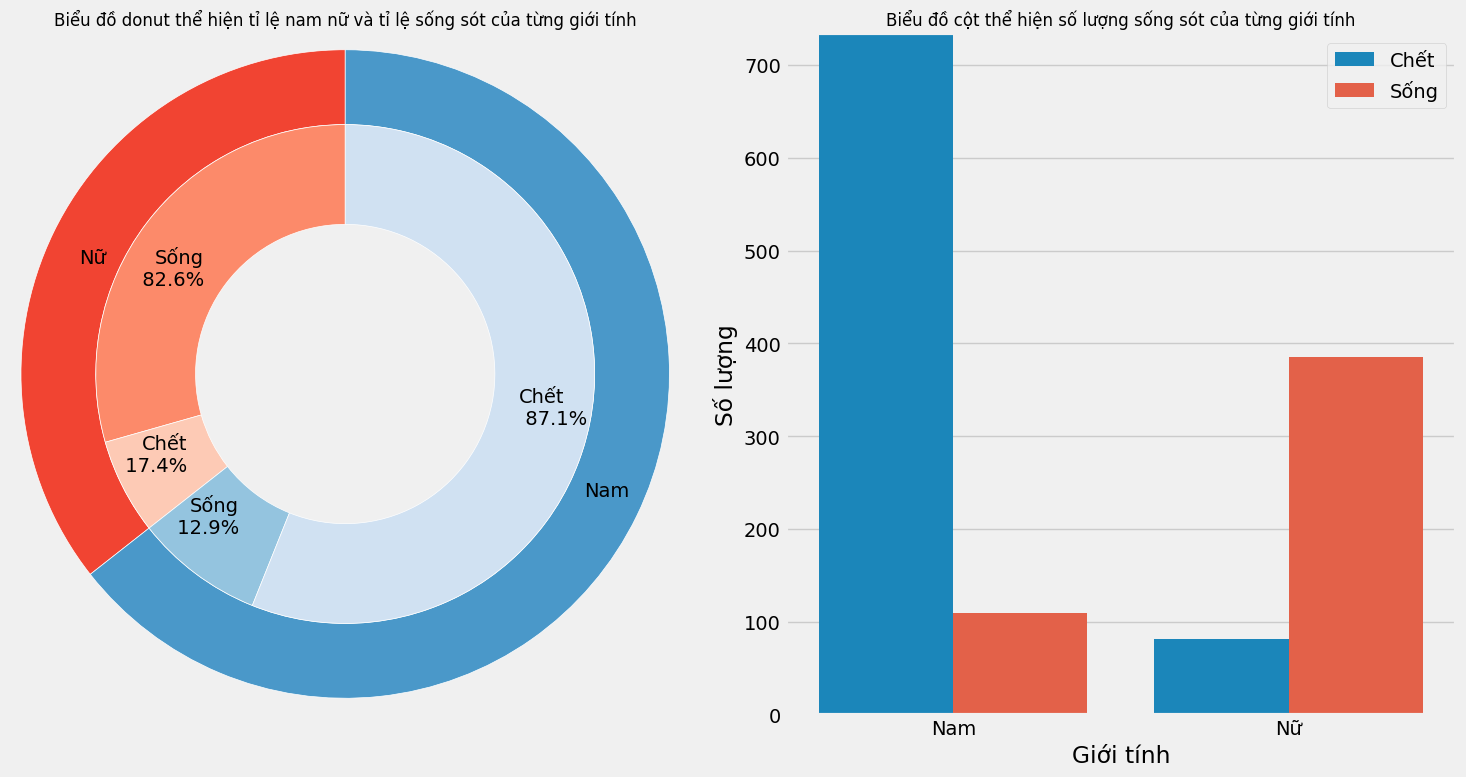

In [118]:
# Tính toán bảng tần số giữa giới tính và khả năng sống sót
gender_survived = pd.crosstab(df['Sex'], df['Survived'])
# Tính toán tỷ lệ sống sót ở từng giới tính
total_gender = gender_survived.sum(axis=1)
total_survived = gender_survived[1]
survived_size = [total_survived['female'], total_gender['female'] - total_survived['female'],
                 total_survived['male'], total_gender['male'] - total_survived['male']]
survived_rate = [np.round(100*total_survived["female"]/total_gender["female"], 1), 
                 np.round(100*total_survived["male"]/total_gender["male"], 1)]
survived_label = [f'Sống\n {survived_rate[0]}%', 
                  f'Chết\n {np.round(100-survived_rate[0], 1)}%', 
                  f'Sống\n {survived_rate[1]}%', 
                  f'Chết\n {100-survived_rate[1]}%']
# Màu sắc
red, blue = [plt.cm.Reds, plt.cm.Blues]
# Vẽ biểu đồ donut chart
# Vẽ vòng bên ngoài (giới tính)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
mypie, _= axes[0].pie(total_gender.values.tolist(), radius=1.3, startangle=90, labels = ['Nữ', 'Nam'], 
                      colors=[red(0.6), blue(0.6)], labeldistance=0.82)
axes[0].axis('equal')
plt.setp(mypie, width=0.3, edgecolor='white')
# Vẽ vòng bên trong (tỉ lệ sống sót)
mypie2, _ = axes[0].pie(survived_size, radius=1, startangle=90, labels=survived_label, 
                        labeldistance = 0.71, colors=[red(0.4), red(0.2), blue(0.4), blue(0.2)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
axes[0].set_title('Biểu đồ donut thể hiện tỉ lệ nam nữ và tỉ lệ sống sót của từng giới tính', fontsize=12)
# Vẽ biểu đồ cột
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Biểu đồ cột thể hiện số lượng sống sót của từng giới tính', fontsize=12)
axes[1].set_xlabel('Giới tính')
axes[1].set_xticklabels(['Nam', 'Nữ'])
axes[1].set_ylabel('Số lượng')
axes[1].legend(['Chết', 'Sống'])

plt.tight_layout()
plt.show()

- Nhận xét:
    - Số lượng hành khách nam trên tàu cao chiếm phần đông hơn so với hành khách nữ, hơn 700 hành khách nam và chỉ khoảng 400 hành khách nữ.
    - Tuy nhiên, tỷ lệ sống sót của hành khách nữ cao hơn rất nhiều so với hành khách nam. Cụ thể có tới hơn 80% hành khách nữ sống sót trong khi tỷ lệ sống sót của hành khách nam chỉ khoảng 20%. Điều này cho thấy rằng việc cứu nạn trên chuyến tàu `Titanic` ưu tiên cho hành khách nữ cũng như các hành khách nam đã chủ động nhường chỗ cho hành khách nữ.

### Tuổi của hành khách trên tàu phân bố như nào? Nhóm tuổi nào có tỷ lệ sống sót cao?

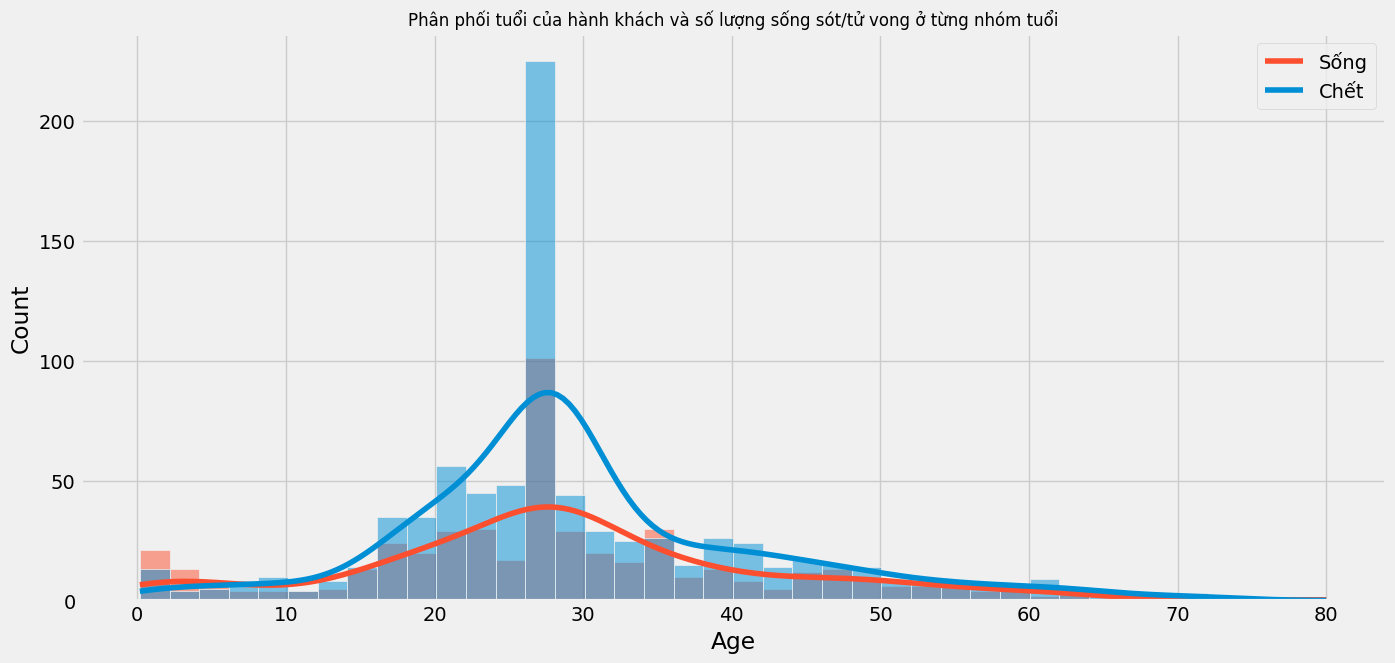

In [119]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df, x='Age', hue='Survived', bins=40, kde=True, ax=ax)
ax.set_title('Phân phối tuổi của hành khách và số lượng sống sót/tử vong ở từng nhóm tuổi', fontsize=12)
ax.legend(['Sống', 'Chết'])

plt.show()

- Nhận xét:
    - Hành khách trên tàu `titanic` có độ tuổi phân bố rộng từ 1 tuổi đến 80 tuổi, trong đó tập trung nhiều ở nhóm tuổi từ 20 đến 30 tuổi.
    - Ở nhóm tuổi dưới 10 tuổi, tỷ lệ sống sót cao hơn so với các nhóm tuổi khác. Điều này cho thấy rằng việc cứu nạn trên chuyến tàu `Titanic` ưu tiên cho trẻ em.
    - Nhóm tuổi từ 20 đến 30 tuổi có số lượng hành khách nhiều nhất nhưng tỷ lệ sống sót thấp có thể do họ đã chủ động nhường chỗ cho trẻ em và người lớn tuổi.

### Hạng vé có anh hưởng đến khả năng sống sót không? Có mối liên hệ nào giữa giới tính và hạng vé không? Điều này ảnh hưởng thế nào đến khả năng sống sót?

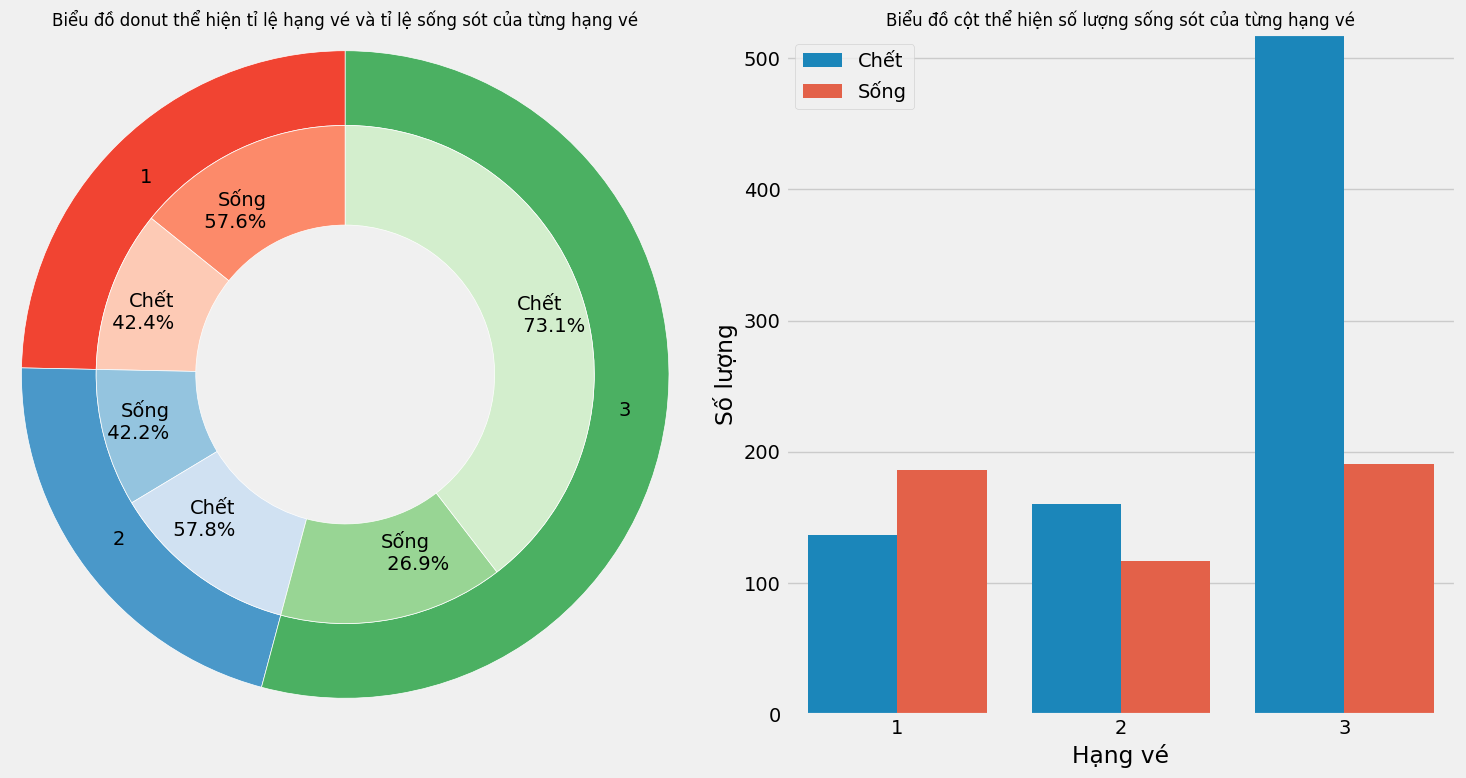

In [120]:
# Tính toán tần số giữa hạng vé và khả năng sống sót
pclass_survived = pd.crosstab(df['Pclass'], df['Survived'])
# Tính toán tỷ lệ sống sót ở từng hạng vé
total_pclass = pclass_survived.sum(axis=1)
total_pclass_survived = pclass_survived[1]
pclass_survived_size = [total_pclass_survived[1], total_pclass[1] - total_pclass_survived[1],
                        total_pclass_survived[2], total_pclass[2] - total_pclass_survived[2],
                        total_pclass_survived[3], total_pclass[3] - total_pclass_survived[3]]
survived_pclass_rate = [np.round(100*total_pclass_survived[1]/total_pclass[1], 1),
                        np.round(100*total_pclass_survived[2]/total_pclass[2], 1),
                        np.round(100*total_pclass_survived[3]/total_pclass[3], 1)]
survived_pclass_label = [f'Sống\n {survived_pclass_rate[0]}%', 
                         f'Chết\n {100-survived_pclass_rate[0]}%', 
                         f'Sống\n {survived_pclass_rate[1]}%', 
                         f'Chết\n {100-survived_pclass_rate[1]}%', 
                         f'Sống\n {survived_pclass_rate[2]}%', 
                         f'Chết\n {100-survived_pclass_rate[2]}%']

# Màu sắc
red, blue, green = [plt.cm.Reds, plt.cm.Blues, plt.cm.Greens]
# Vẽ biểu đồ donut chart
# Vẽ vòng bên ngoài
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
mypie, _= axes[0].pie(total_pclass.values.tolist(), radius=1.3, startangle=90, labels = ['1', '2', '3'], 
                      colors=[red(0.6), blue(0.6), green(0.6)], labeldistance=0.85)
axes[0].axis('equal')
plt.setp(mypie, width=0.3, edgecolor='white')
# Vẽ vòng bên trong (tỉ lệ sống sót)
mypie2, _ = axes[0].pie(pclass_survived_size, radius=1, startangle=90, labels=survived_pclass_label, 
                        labeldistance = 0.73, colors=[red(0.4), red(0.2), blue(0.4), blue(0.2), green(0.4), green(0.2)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
axes[0].set_title('Biểu đồ donut thể hiện tỉ lệ hạng vé và tỉ lệ sống sót của từng hạng vé', fontsize=12)
# # Vẽ biểu đồ cột
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Biểu đồ cột thể hiện số lượng sống sót của từng hạng vé', fontsize=12)
axes[1].set_xlabel('Hạng vé')
axes[1].set_xticklabels(['1', '2', '3'])
axes[1].set_ylabel('Số lượng')
axes[1].legend(['Chết', 'Sống'])

plt.tight_layout()
plt.show()

- Nhận xét:
    - Hành khách ở hạng vé thấp (hạng 3) chiếm phần đông nhất, tiếp theo là hạng 1 và hạng 2, cho thấy rằng phần lớn hành khách trên chuyến tàu `Titanic` không phải là người quá giàu có hoặc có thể vì họ không chủ động chọn hạng vé cao do hết chỗ.
    - Tỷ lệ sống sót của hành khách ở hạng vé cao (hạng 1) cao hơn so với hành khách ở hạng vé thấp (hạng 3) và hạng vé trung bình (hạng 2). Điều này cho thấy rằng hành khách ở hạng vé cao có ưu tiên cứu nạn hơn so với hành khách ở hạng vé thấp. Vì vậy ở hoàn cảnh này mới thấy rỏ được đồng tiền có sức ảnh hưởng lớn đến nhường nào.

In [121]:
# Tạo bảng crosstab giữa Sex, Pclass và Survived
pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], margins=True).style.background_gradient(cmap='GnBu')

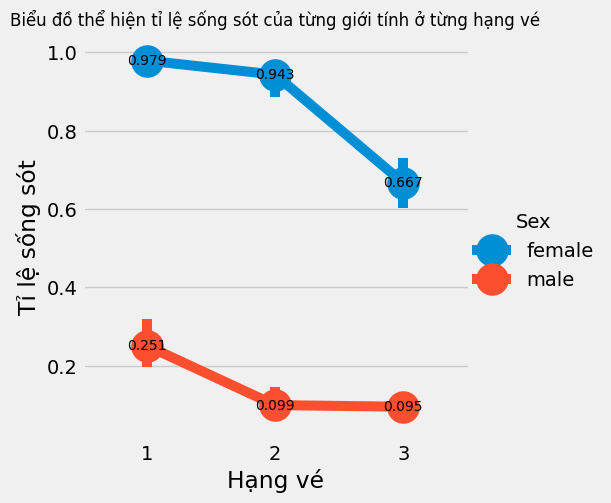

In [122]:
catplot = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')
for line in catplot.ax.lines:
    x, y = line.get_data()
    if len(x) == 3:
        for i, j in zip(x, y):
            catplot.ax.text(i, j, str(np.round(j, 3)), ha='center', va='center', fontsize=10)
plt.ylabel('Tỉ lệ sống sót')
plt.xlabel('Hạng vé')
plt.title('Biểu đồ thể hiện tỉ lệ sống sót của từng giới tính ở từng hạng vé', fontsize=12)
plt.show()

- Nhận xét:
    - Hành khách nam chiếm phần đông ở cả 3 hạng vé, tuy nhiên tỷ lệ sống sót của hành khách nữ cao hơn rất nhiều so với hành khách nam ở cả 3 hạng vé. Cụ thể, ở hạng vé 1 thì có đến tận 141/144 phụ nữ sống sót. Điều này cho thấy rằng việc cứu nạn trên chuyến tàu `Titanic` ưu tiên cho hành khách nữ hơn so với hành khách nam.
    - Giống như đã nói ở trên, thì dù là nam hay nữ, hành khách ở hạng vé cao có tỷ lệ sống sót cao hơn so với hành khách ở hạng vé thấp.

### Có mối quan hệ giữa số lượng thành viên gia đình đi cùng với khả năng sống sót không?

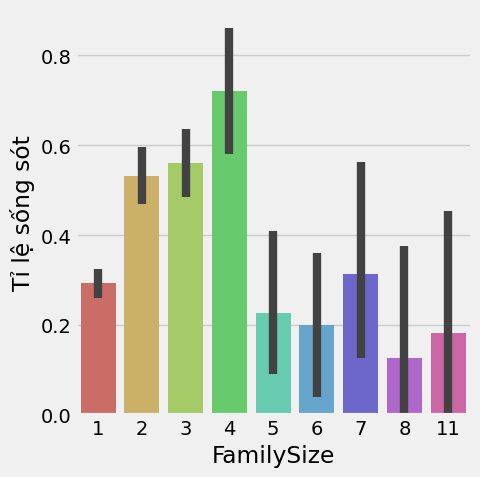

In [123]:
g = sns.catplot(x = "FamilySize", y = "Survived", data = df, kind = "bar", palette='hls')
g.set_ylabels("Tỉ lệ sống sót")
g.set_titles("Tỉ lệ sống sót theo kích thước gia đình")
plt.show()

- Nhận xét:
    - Như ở trên, ta thấy rằng hành khách đi một mình chiếm phần đông nhất, nhưng tỷ lệ sống sót của họ thấp hơn so với hành khách đi cùng gia đình.
    - Những hành khách đi cùng gia đình không quá đông tuy nhiên tỷ lệ sống sót của họ tương đối cao, đặc biệt là nhóm có 2, 3 hoặc 4 thành viên gia đình đi cùng.
    - Điều này cho thấy rằng việc cứu nạn trên chuyến tàu `Titanic` ưu tiên cho nhóm hành khách đi cùng gia đình hơn so với nhóm hành khách đi một mình. Có lẽ những người đi một mình đã nhường chỗ cho những người đi cùng gia đình vì họ không nỡ thấy cảnh gia đình người khác phải bị chia cắt.

### Trong những hành khách nữ, ta đều thấy tỷ lệ sống sót cao hơn so với hành khách nam. Tuy nhiên dựa vào tiền tố trong cột name, ta có thể xác định được nhóm tuổi các hành khách nữ này. Liệu có sự khác biệt về tỷ lệ sống sót giữa các nhóm tuổi này không?

In [124]:
female_df = df[df['Sex'] == 'female']
female_df['Title'].value_counts()

Title
Miss     265
Mrs      198
Other      3
Name: count, dtype: int64

Có 3 nữ hành khách có tiền tố là 'Other' không thể xác định được nhóm tuổi nên ta sẽ bỏ qua 3 hành khách này.

In [125]:
female_df = female_df.drop(female_df[female_df['Title'] == 'Other'].index)
female_df['Title'].value_counts()

Title
Miss    265
Mrs     198
Name: count, dtype: int64

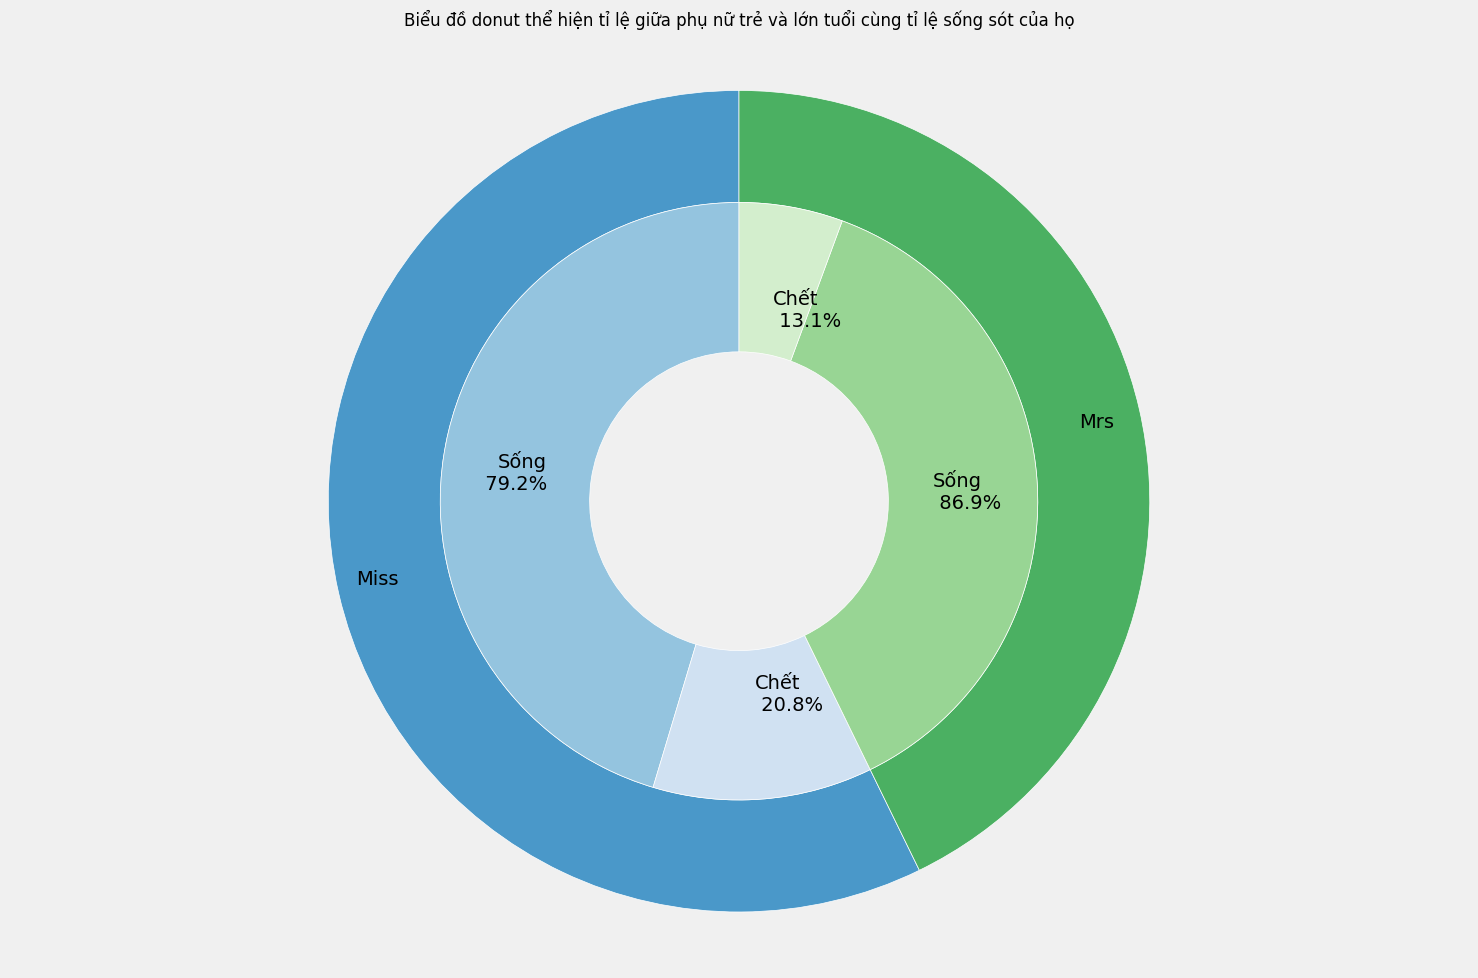

In [126]:
# Tính toán tần số giữa hạng vé và khả năng sống sót
female_survived = pd.crosstab(female_df['Title'], female_df['Survived'])
# Tính toán tỷ lệ sống sót ở từng hạng vé
total_female = female_survived.sum(axis=1)
total_female_survived = female_survived[1]
female_survived_size = [total_female_survived['Miss'], total_female['Miss'] - total_female_survived['Miss'],
                        total_female_survived['Mrs'], total_female['Mrs'] - total_female_survived['Mrs']]
survived_female_rate = [np.round(100*total_female_survived['Miss']/total_female['Miss'], 1),
                        np.round(100*total_female_survived['Mrs']/total_female['Mrs'], 1)]
survived_female_label = [f'Sống\n {survived_female_rate[0]}%', 
                         f'Chết\n {np.round(100-survived_female_rate[0], 1)}%', 
                         f'Sống\n {survived_female_rate[1]}%', 
                         f'Chết\n {np.round(100-survived_female_rate[1], 1)}%']

# Màu sắc
red, blue = [plt.cm.Blues, plt.cm.Greens]
# Vẽ biểu đồ donut chart
# Vẽ vòng bên ngoài
fig, axes = plt.subplots(figsize=(15, 10))
mypie, _= axes.pie(total_female.values.tolist(), radius=1.1, startangle=90, labels = ['Miss', 'Mrs'], 
                      colors=[red(0.6), blue(0.6)], labeldistance=0.85)
axes.axis('equal')
plt.setp(mypie, width=0.3, edgecolor='white')
# Vẽ vòng bên trong (tỉ lệ sống sót)
mypie2, _ = axes.pie(female_survived_size, radius=0.8, startangle=90, labels=survived_female_label, 
                        labeldistance = 0.65, colors=[red(0.4), red(0.2), blue(0.4), blue(0.2)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
axes.set_title('Biểu đồ donut thể hiện tỉ lệ giữa phụ nữ trẻ và lớn tuổi cùng tỉ lệ sống sót của họ', fontsize=12)

plt.tight_layout()
plt.show()

- Nhận xét:
    - Trong các hành khách nữ, những người trẻ chưa kết hôn chiếm phần đông so với những người đã lập gia đình. 
    - Tỉ lệ sống sót của 2 nhóm này không có sự chênh lệch lớn, tuy nhiên nhóm hành khách nữ đã lập gia đình có tỷ lệ sống sót cao hơn so với nhóm hành khách nữ trẻ chưa kết hôn. Điều này có thể do nhóm hành khách nữ đã lập gia đình đã được ưu tiên cứu nạn hơn so với nhóm hành khách nữ trẻ chưa kết hôn hoặc có thể do nhóm hành khách nữ trẻ chưa kết hôn đã chủ động nhường chỗ cho nhóm hành khách nữ lớn tuổi đã lập gia đình.

### Phần lớn khách hàng xuất phát từ cảng nào? Có mối liên hệ nào giữa cảng lên tàu và hạng vé không? Nếu có thì điều này ảnh hưởng thế nào đến khả năng sống sót?

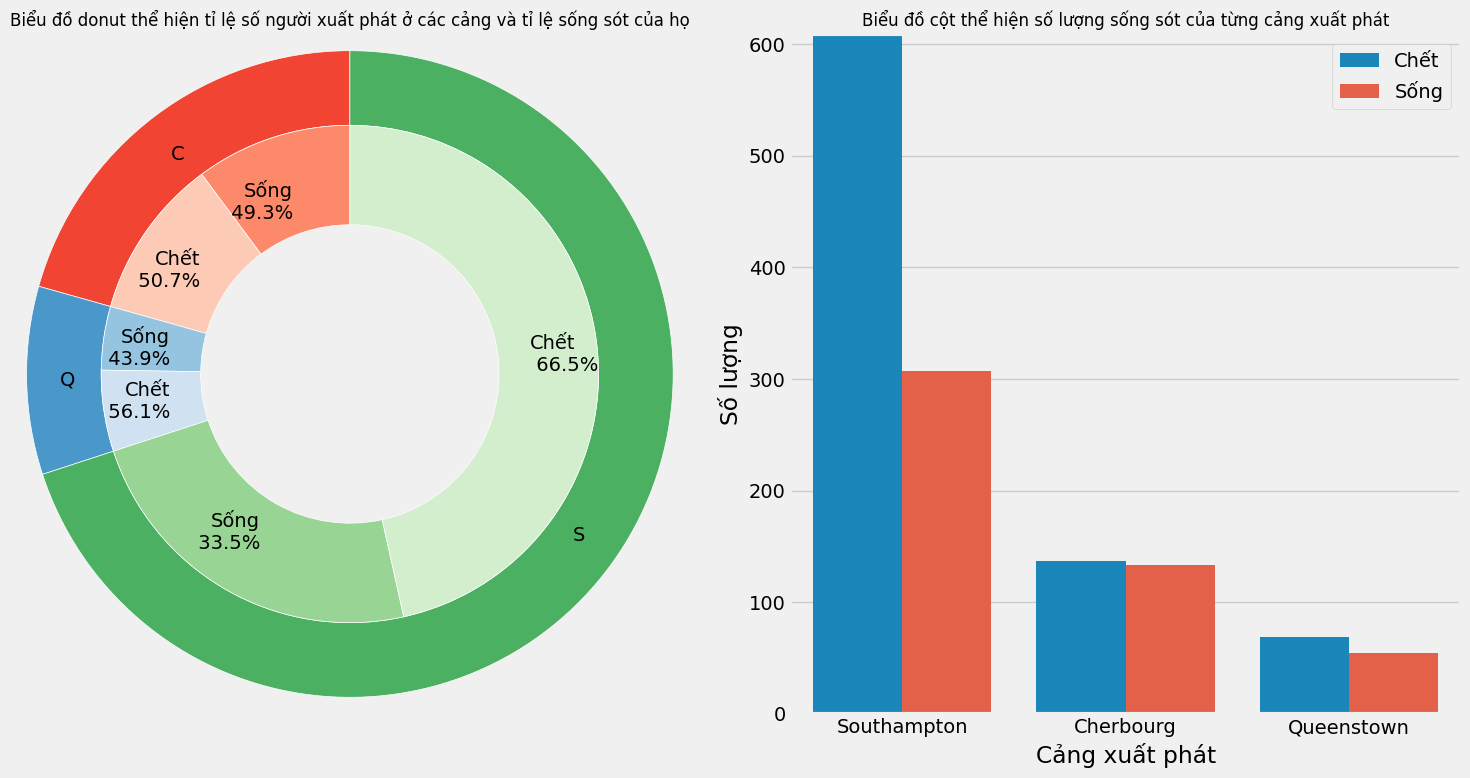

In [127]:
# Tính toán tần số giữa cảng xuất phát và khả năng sống sót
embarked_survived = pd.crosstab(df['Embarked'], df['Survived'])
# Tính toán tỷ lệ sống sót ở từng cảng xuất phát
total_embarked = embarked_survived.sum(axis=1)
total_embarked_survived = embarked_survived[1]
embarked_survived_size = [total_embarked_survived['C'], total_embarked['C'] - total_embarked_survived['C'],
                        total_embarked_survived['Q'], total_embarked['Q'] - total_embarked_survived['Q'],
                        total_embarked_survived['S'], total_embarked['S'] - total_embarked_survived['S']]
survived_embarked_rate = [np.round(100*total_embarked_survived['C']/total_embarked['C'], 1),
                        np.round(100*total_embarked_survived['Q']/total_embarked['Q'], 1),
                        np.round(100*total_embarked_survived['S']/total_embarked['S'], 1)]
survived_embarked_label = [f'Sống\n {survived_embarked_rate[0]}%', 
                         f'Chết\n {100-survived_embarked_rate[0]}%', 
                         f'Sống\n {survived_embarked_rate[1]}%', 
                         f'Chết\n {100-survived_embarked_rate[1]}%', 
                         f'Sống\n {survived_embarked_rate[2]}%', 
                         f'Chết\n {100-survived_embarked_rate[2]}%']

# Màu sắc
red, blue, green = [plt.cm.Reds, plt.cm.Blues, plt.cm.Greens]
# Vẽ biểu đồ donut chart
# Vẽ vòng bên ngoài (giới tính)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
mypie, _= axes[0].pie(total_embarked.values.tolist(), radius=1.3, startangle=90, labels = ['C', 'Q', 'S'], 
                      colors=[red(0.6), blue(0.6), green(0.6)], labeldistance=0.85)
axes[0].axis('equal')
plt.setp(mypie, width=0.3, edgecolor='white')
# Vẽ vòng bên trong (tỉ lệ sống sót)
mypie2, _ = axes[0].pie(embarked_survived_size, radius=1, startangle=90, labels=survived_embarked_label, 
                        labeldistance = 0.73, colors=[red(0.4), red(0.2), blue(0.4), blue(0.2), green(0.4), green(0.2)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
axes[0].set_title('Biểu đồ donut thể hiện tỉ lệ số người xuất phát ở các cảng và tỉ lệ sống sót của họ', fontsize=12)
# # Vẽ biểu đồ cột
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Biểu đồ cột thể hiện số lượng sống sót của từng cảng xuất phát', fontsize=12)
axes[1].set_xlabel('Cảng xuất phát')
axes[1].set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
axes[1].set_ylabel('Số lượng')
axes[1].legend(['Chết', 'Sống'])

plt.tight_layout()
plt.show()

- Nhận xét:
    - Phần lon hành khách lên tàu từ cảng Southampton, tiếp theo là cảng Cherbourg và cuối cùng là cảng Queenstown.
    - Tỉ lệ sống sót của các hành khách xuất phát từ 3 cảng này đều thấp tuy nhiên tỉ lệ sống của các hành khách xuất phát từ cảng Southampton thấp hơn nhiều so với các hành khách xuất phát từ cảng Cherbourg và cảng Queenstown. Điều này có thể do cảng Southampton có nhiều hành khách ở hạng vé thấp hơn so với cảng Cherbourg và cảng Queenstown.
- Để chắc chắn hơn, ta sẽ kiểm tra mối liên hệ giữa cảng lên tàu và hạng vé của hành khách.

In [128]:
# Tạo bảng crosstab giữa Embarked, Pclass và Survived
pd.crosstab([df['Embarked'], df['Survived']], df['Pclass'], margins=True).style.background_gradient(cmap='GnBu')

- Nhận xét:
    - Như ta đã thấy ở trên, hành khách xuất phát từ cảng Southampton có tỉ lệ sống sót thấp nhất cũng một phần là vì hầu hết các hành khách xuất phát từ cảng này đều ở khoang vé thấp. Mà như ta đã phân tích phía trên thì hành khách ở hạng vé thấp có tỉ lệ sống sót thấp hơn so với hành khách ở hạng vé cao, vì vậy chính điều này đã dẫn đến tỉ lệ sống sót của các hành khách đến từ cảng Southampton thấp hơn so với các hành khách đến từ cảng Cherbourg và cảng Queenstown.

### Giá vé phân bố như thế nào trên tàu `Titanic`? Có mối quan hệ giữa giá vé và khả năng sống sót không?

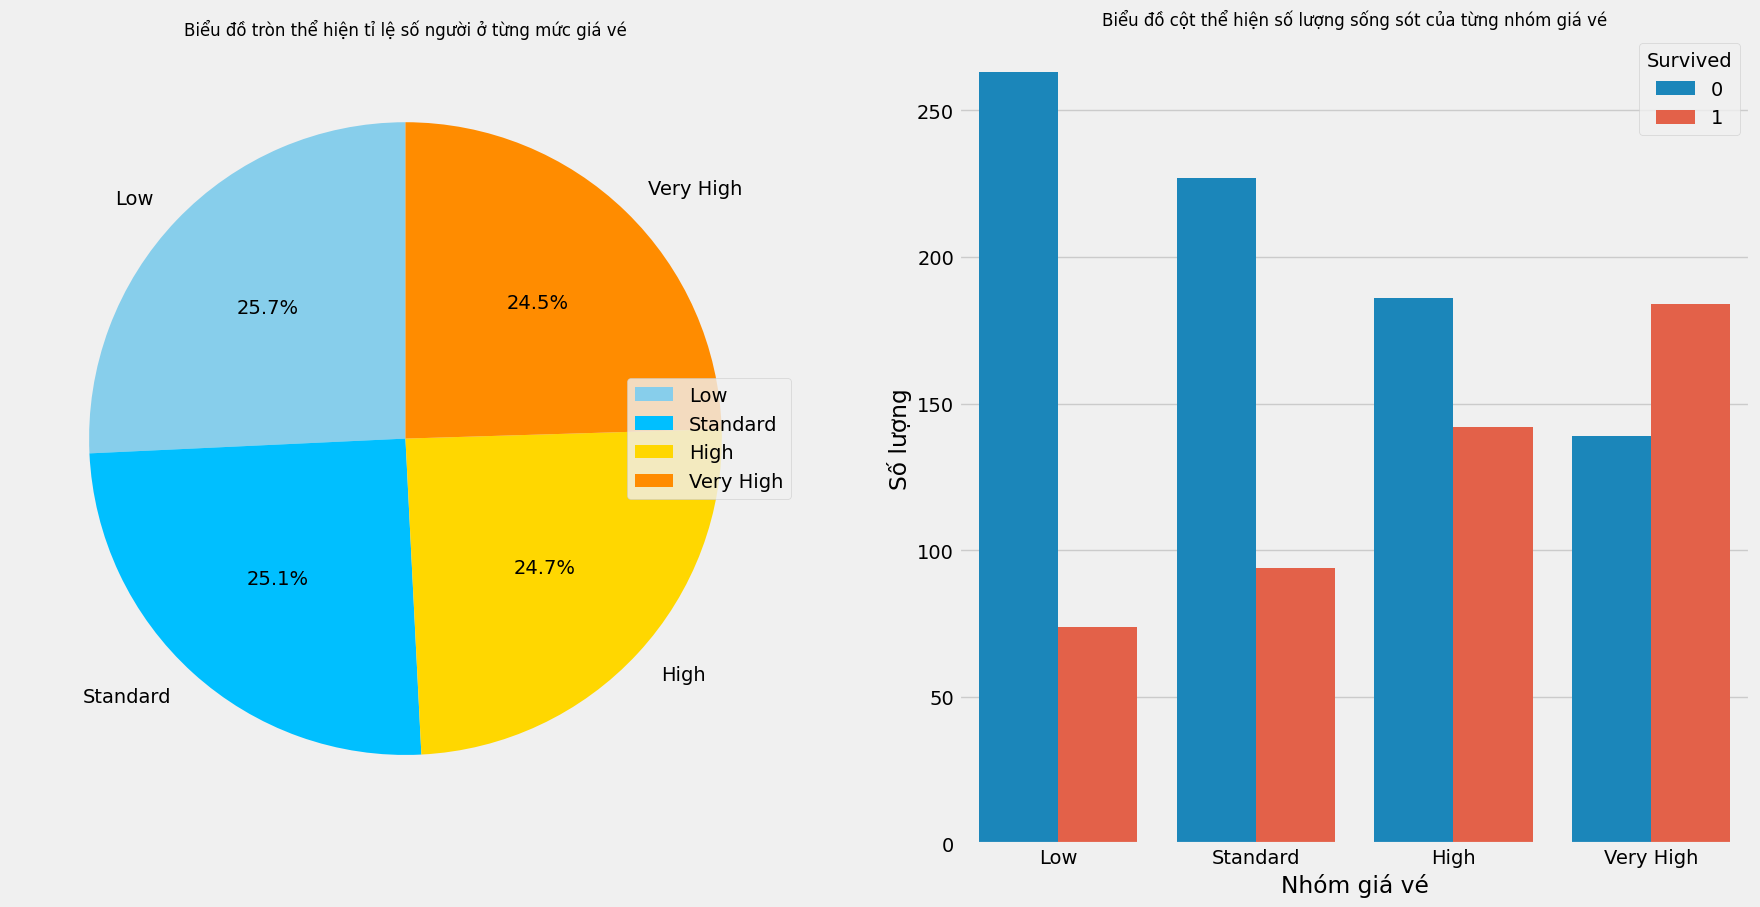

In [129]:
fare_categories = ['Low', 'Standard', 'High', 'Very High']
quartile_data = pd.qcut(df.Fare, 4, labels=fare_categories)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].pie(quartile_data.value_counts().tolist(), labels=fare_categories, 
            colors=['skyblue', 'deepskyblue', 'gold', 'darkorange'],
            startangle=90, autopct='%1.1f%%')
axes[0].set_title('Biểu đồ tròn thể hiện tỉ lệ số người ở từng mức giá vé', fontsize=12)
axes[0].legend(loc='right')

sns.countplot(x=quartile_data, hue='Survived', data=df, ax=axes[1])
axes[1].set_xlabel('Nhóm giá vé')
axes[1].set_ylabel('Số lượng')
axes[1].set_title('Biểu đồ cột thể hiện số lượng sống sót của từng nhóm giá vé', fontsize=12)
plt.show()

- Nhận xét:
    - Khách hàng trên tàu được phân bố đồng đều vô 4 nhóm vé: `Low`, `Standard`, `High` và `Very High`. Số lượng khách hàng ở nhóm vé thấp hơn (`Low`, `Standard`) có phần nhỉn hơn một chút so với nhóm vé cao hơn (`High`, `Very High`).
    - Điều thú vụ là tỷ lệ sống sót của khách hàng ở nhóm vé cao hơn (`High`, `Very High`) cao hơn rất nhiều so với khách hàng ở nhóm vé thấp hơn (`Low`, `Standard`). Điều này cho thấy rằng việc cứu nạn trên chuyến tàu `Titanic` ưu tiên cho khách hàng ở nhóm vé cao hơn. Vì vậy ta thấy được những hành khách quý tộc sẽ được ưu tiên sống sót hơn rất nhiều so với hành khách bình dân.
    - Nhìn chung, tỷ lệ sống sót của một người sẽ tỉ lệ thuận với số tiền mà họ bỏ ra để có được chiếc vé trên tàu `Titanic`. Bạn sẽ luốn được ưu tiên cứu trợ khi có vé ở trên các khoang hạng sang của tàu.

## 7. Kết luận 📝

- Có rất nhiều yếu tố ảnh hưởng đến khả năng sống sót của hành khách trên chuyến tàu `Titanic` như giới tính, tuổi, hạng vé, số lượng thành viên gia đình đi cùng, cảng lên tàu và giá vé.
- Mỗi yếu tố đều có ảnh hưởng riêng và có thể kết hợp với nhau để chúng ta có thể ngầm nhận ra được việc ưu tiên cứu nạn trên chuyến tàu `Titanic` đã diễn ra như thế nào.
- Việc cứu nạn trên chuyến tàu `Titanic` ưu tiên cho hành khách nữ, trẻ em, người già, hành khách ở hạng vé cao và hành khách có gia đình đi cùng. Điều này cho thấy rằng trong hoàn cảnh khẩn cấp, con người vẫn luôn có lòng nhân ái và sẵn lòng giúp đỡ những người yếu đuối hơn mình.
- Đây là một trong những vụ tai nạn thương tâm nhất trong lịch sử hàng hải và đã để lại nhiều bài học quý giá về lòng nhân ái và sự đoàn kết giữa con người với nhau.

---
<p style="text-align:center; font-size:30px;">END</p>